In [ ]:
# Install the TorchOptics package
!pip install torchoptics
from IPython.display import clear_output
clear_output()

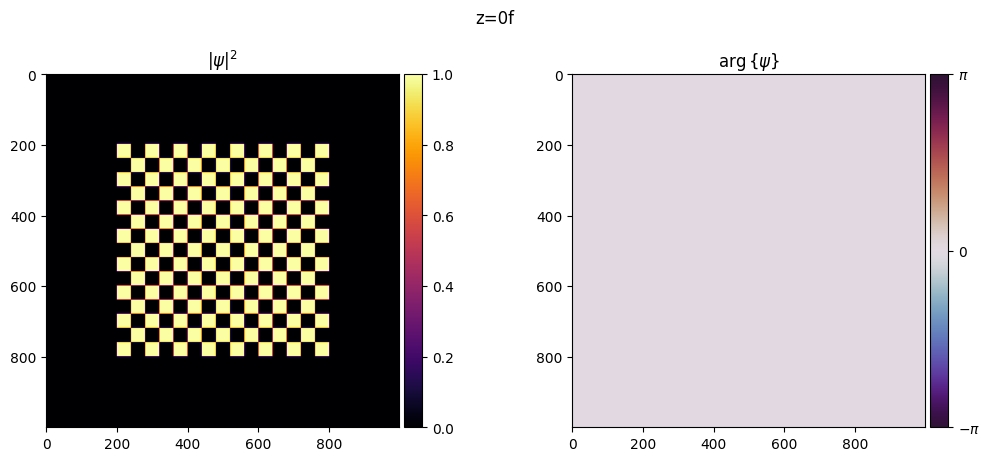

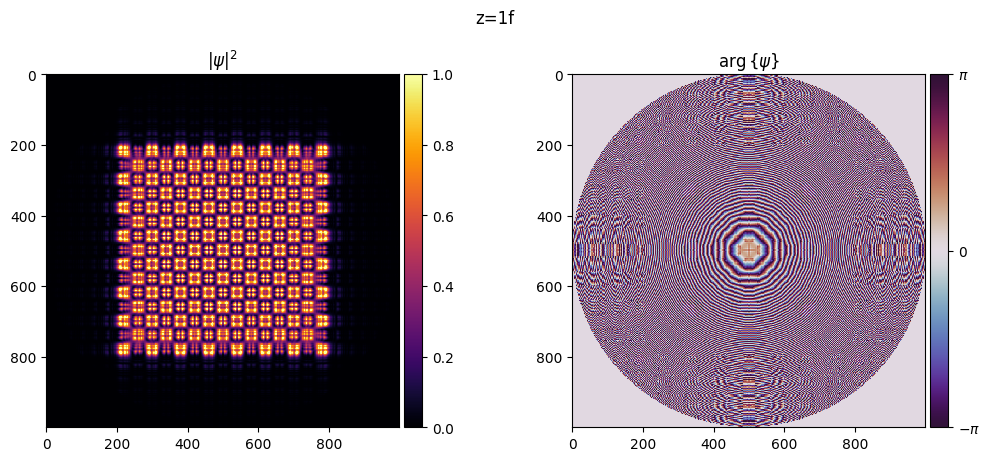

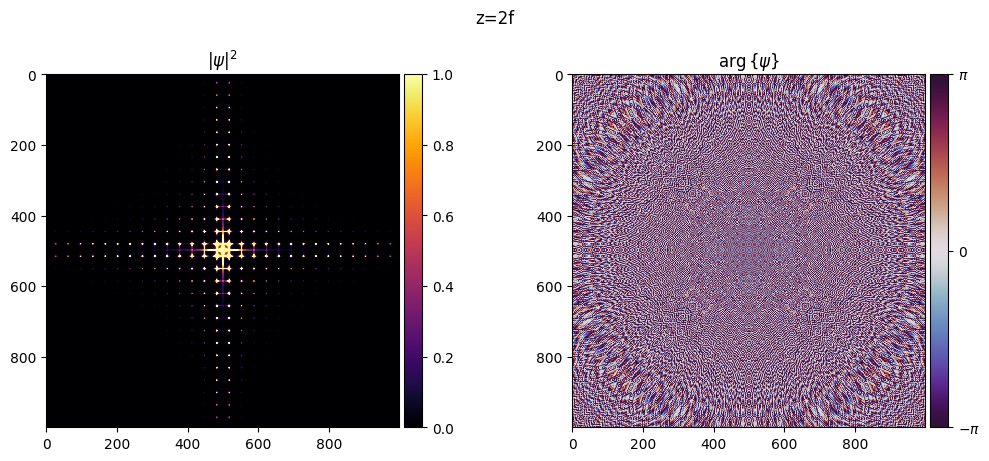

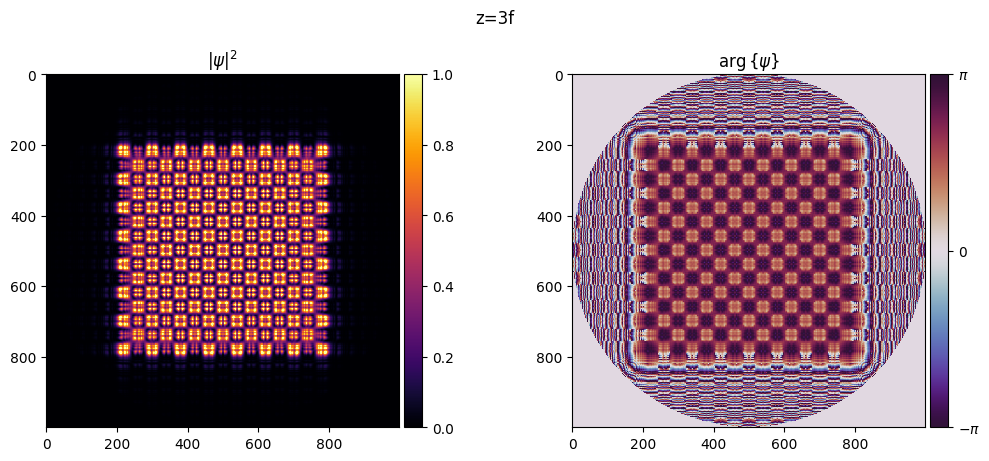

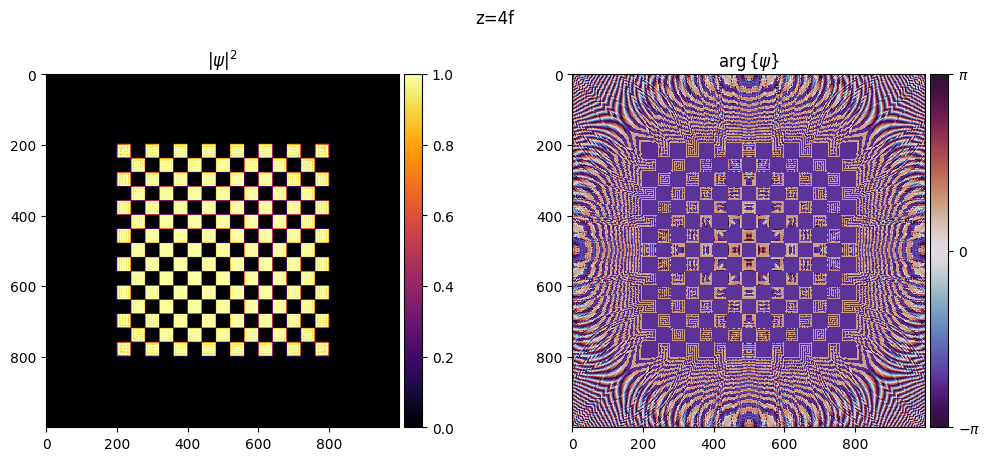

In [ ]:
import torch
import torchoptics
from torchoptics import Field, System
from torchoptics.elements import Lens
from torchoptics.profiles import checkerboard

# Set simulation properties
shape = 1000  # Number of grid points in each dimension
spacing = 10e-6  # Spacing between grid points (m)
wavelength = 700e-9  # Field wavelength (m)
focal_length = 200e-3  # Lens focal length (m)
tile_length = 400e-6  # Checkerboard tile length (m)
num_tiles = 15  # Number of tiles in each dimension

# Determine device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Configure default properties
torchoptics.set_default_spacing(spacing)
torchoptics.set_default_wavelength(wavelength)

# Initialize input field with checkerboard pattern
field_data = checkerboard(shape, tile_length, num_tiles)
input_field = Field(field_data).to(device)

# Define 4f optical system with two lenses
system = System(
    Lens(shape, focal_length, z=1 * focal_length),
    Lens(shape, focal_length, z=3 * focal_length),
).to(device)

# Measure field at focal planes along the z-axis
measurements = [system.measure_at_z(input_field, z=i * focal_length) for i in range(5)]

# Visualize the measured intensity distributions
for i, measurement in enumerate(measurements):
    measurement.visualize(title=f"z={i}f", vmax=1)